# **Importing the data and explore it and preprocess it as needed**

In [496]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [497]:
data1 = pd.read_csv('Train.csv')
data2 = pd.read_csv('Train_Vehicletravellingdata.csv')
data3 = pd.read_csv('Train_WeatherData.csv')

In [498]:
data1.shape

(12994, 5)

In [499]:
data2.shape

(162566, 10)

In [500]:
data3.shape

(162566, 9)

In [501]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'V2', 'V5', 'V6', 'DrivingStyle'], dtype='object')
Index(['ID', 'V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V18'], dtype='object')
Index(['ID', 'V1', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19'], dtype='object')


In [502]:
data1 = data1.rename(columns = {'V2':'veincle length' ,
                        'V5':'veincle weight' ,
                        'V6':'axles number'})

In [503]:
data2 = data2.rename(columns = {'V1':'time of collection' ,
                        'V3':'Lane of the road' ,
                        'V4':'veincle speed',
                        'V7':'perceding Veincle ID',
                        'V8':'perceding veincle speed',
                        'V9':'perceding veincle weight',
                        'V10':'perceding veincle length',
                        'V11':'perceding veincle time-gap',
                        'V18':'road condition'})

In [504]:
data3 = data3.rename(columns = {'V1':'time of collection' ,
                        'V12':'Air temprture' ,
                        'V13':'perciption type',
                        'V14':'perciption intensity',
                        'V15':'relatve humadity',
                        'V16':'wind direction',
                        'V17':'wind speed',
                        'V19':'Lighting condition'})

In [505]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'veincle length', 'veincle weight', 'axles number',
       'DrivingStyle'],
      dtype='object')
Index(['ID', 'time of collection', 'Lane of the road', 'veincle speed',
       'perceding Veincle ID', 'perceding veincle speed',
       'perceding veincle weight', 'perceding veincle length',
       'perceding veincle time-gap', 'road condition'],
      dtype='object')
Index(['ID', 'time of collection', 'Air temprture', 'perciption type',
       'perciption intensity', 'relatve humadity', 'wind direction',
       'wind speed', 'Lighting condition'],
      dtype='object')


In [506]:
data1.isnull().sum()

ID                0
veincle length    0
veincle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [507]:
data2.isnull().sum()

ID                               0
time of collection               0
Lane of the road                 0
veincle speed                    0
perceding Veincle ID             0
perceding veincle speed          0
perceding veincle weight         0
perceding veincle length         0
perceding veincle time-gap    2455
road condition                   0
dtype: int64

In [508]:
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture           2057
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [509]:
data1.isna().sum()


ID                0
veincle length    0
veincle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [510]:
data2.isna().sum()


ID                               0
time of collection               0
Lane of the road                 0
veincle speed                    0
perceding Veincle ID             0
perceding veincle speed          0
perceding veincle weight         0
perceding veincle length         0
perceding veincle time-gap    2455
road condition                   0
dtype: int64

In [511]:
data3.isna().sum()

ID                         0
time of collection         0
Air temprture           2057
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [512]:
print(int(data2['perceding veincle time-gap'].mean()))
print(int(data2['perceding veincle time-gap'].median()))
data2['perceding veincle time-gap'].fillna( value = int(data2['perceding veincle time-gap'].median()),inplace= True)
#data2['perceding veincle time-gap'].skew()
data2.isnull().sum()

105
43


ID                            0
time of collection            0
Lane of the road              0
veincle speed                 0
perceding Veincle ID          0
perceding veincle speed       0
perceding veincle weight      0
perceding veincle length      0
perceding veincle time-gap    0
road condition                0
dtype: int64

In [513]:
print(int(data3['Air temprture'].mean()))
print(int(data3['Air temprture'].median()))
data3['Air temprture'].fillna( value = int(data3['Air temprture'].median()),inplace= True)

#data3.isnull().sum()

4
5


In [514]:
data2['road condition'] = pd.factorize(data2['road condition'])[0]

In [515]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          162566 non-null  object 
 1   time of collection          162566 non-null  object 
 2   Lane of the road            162566 non-null  int64  
 3   veincle speed               162566 non-null  int64  
 4   perceding Veincle ID        162566 non-null  int64  
 5   perceding veincle speed     162566 non-null  int64  
 6   perceding veincle weight    162566 non-null  int64  
 7   perceding veincle length    162566 non-null  int64  
 8   perceding veincle time-gap  162566 non-null  float64
 9   road condition              162566 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 12.4+ MB


In [516]:
data2_gropued = data2.groupby('ID')[['perceding veincle time-gap','Lane of the road','veincle speed','perceding veincle speed','perceding veincle weight','perceding veincle length','road condition']].mean()

In [517]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   perceding veincle time-gap  12994 non-null  float64
 1   Lane of the road            12994 non-null  float64
 2   veincle speed               12994 non-null  float64
 3   perceding veincle speed     12994 non-null  float64
 4   perceding veincle weight    12994 non-null  float64
 5   perceding veincle length    12994 non-null  float64
 6   road condition              12994 non-null  float64
dtypes: float64(7)
memory usage: 812.1+ KB


In [518]:
data2_gropued = data2_gropued.astype({'Lane of the road':int})

In [519]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   perceding veincle time-gap  12994 non-null  float64
 1   Lane of the road            12994 non-null  int64  
 2   veincle speed               12994 non-null  float64
 3   perceding veincle speed     12994 non-null  float64
 4   perceding veincle weight    12994 non-null  float64
 5   perceding veincle length    12994 non-null  float64
 6   road condition              12994 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 812.1+ KB


In [520]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              12994 non-null  object
 1   veincle length  12994 non-null  int64 
 2   veincle weight  12994 non-null  int64 
 3   axles number    12994 non-null  int64 
 4   DrivingStyle    12994 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 507.7+ KB


In [521]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          162566 non-null  object 
 1   time of collection          162566 non-null  object 
 2   Lane of the road            162566 non-null  int64  
 3   veincle speed               162566 non-null  int64  
 4   perceding Veincle ID        162566 non-null  int64  
 5   perceding veincle speed     162566 non-null  int64  
 6   perceding veincle weight    162566 non-null  int64  
 7   perceding veincle length    162566 non-null  int64  
 8   perceding veincle time-gap  162566 non-null  float64
 9   road condition              162566 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 12.4+ MB


In [522]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    162566 non-null  object 
 1   time of collection    162566 non-null  object 
 2   Air temprture         162566 non-null  float64
 3   perciption type       162566 non-null  object 
 4   perciption intensity  162566 non-null  object 
 5   relatve humadity      160461 non-null  float64
 6   wind direction        160452 non-null  float64
 7   wind speed            160102 non-null  float64
 8   Lighting condition    162566 non-null  object 
dtypes: float64(4), object(5)
memory usage: 11.2+ MB


In [523]:
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [524]:
print(int(data3['relatve humadity'].mean()))
print(int(data3['relatve humadity'].median()))

60
58


In [525]:
data3['relatve humadity'].fillna( value = data3['relatve humadity'].median)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [526]:
print(int(data3['wind direction'].mean()))
print(int(data3['wind direction'].median()))

182
180


In [527]:
data3['wind direction'].fillna( value = int(data3['wind direction'].median()),inplace= True)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction             0
wind speed              2464
Lighting condition         0
dtype: int64

In [528]:
print(int(data3['wind speed'].mean()))
print(int(data3['wind speed'].median()))

4
4


In [529]:
data3['wind speed'].fillna( value = int(data3['wind speed'].median()),inplace= True)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction             0
wind speed                 0
Lighting condition         0
dtype: int64

In [530]:
data3['perciption type'] = pd.factorize(data3['perciption type'])[0]
data3['perciption intensity'] = pd.factorize(data3['perciption intensity'])[0]
data3['Lighting condition'] = pd.factorize(data3['Lighting condition'])[0]

In [531]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    162566 non-null  object 
 1   time of collection    162566 non-null  object 
 2   Air temprture         162566 non-null  float64
 3   perciption type       162566 non-null  int64  
 4   perciption intensity  162566 non-null  int64  
 5   relatve humadity      160461 non-null  float64
 6   wind direction        162566 non-null  float64
 7   wind speed            162566 non-null  float64
 8   Lighting condition    162566 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 11.2+ MB


In [532]:
data3_gropued = data3.groupby('ID')[['Air temprture','perciption type','perciption intensity','relatve humadity','wind direction','wind speed','Lighting condition']].mean()

In [533]:
data2_gropued.head()

,perceding veincle time-gap,Lane of the road,veincle speed,perceding veincle speed,perceding veincle weight,perceding veincle length,road condition
ID,,,,,,,
DR_10002,234.800000,1,84.400000,77.000000,4200.400000,762.000000,0.0
DR_10013,173.111111,1,86.555556,85.777778,9517.888889,1184.888889,0.0
DR_10023,66.812500,1,83.125000,81.625000,10180.187500,1022.312500,0.0
DR_10024,194.166667,1,86.666667,81.500000,6366.333333,1069.666667,0.0
DR_10025,156.125000,1,81.500000,82.500000,10157.875000,1113.625000,1.0


In [534]:
data3_gropued.head()

,Air temprture,perciption type,perciption intensity,relatve humadity,wind direction,wind speed,Lighting condition
ID,,,,,,,
DR_10002,2.2000,0.0,0.0,66.6000,173.200,5.8000,0.0
DR_10013,4.0000,0.0,0.0,58.0000,163.000,8.0000,2.0
DR_10023,6.0625,0.0,0.0,34.0625,205.875,3.0625,2.0
DR_10024,5.0000,2.0,2.0,NaN,180.000,4.0000,1.0
DR_10025,1.0000,0.0,0.0,87.0000,11.000,3.0000,2.0


In [535]:
data1.head()

,ID,veincle length,veincle weight,axles number,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [536]:
print(data1.shape)
print(data2_gropued.shape)
print(data3_gropued.shape)

(12994, 5)
(12994, 7)
(12994, 7)


In [537]:
data1['ID'].drop_duplicates

<bound method Series.drop_duplicates of 0        DR_24526
1        DR_30052
2        DR_40928
3        DR_66033
4        DR_45266
           ...   
12989    DR_61322
12990    DR_35712
12991    DR_61590
12992    DR_69505
12993    DR_56117
Name: ID, Length: 12994, dtype: object>

In [538]:
merged_data = pd.merge(data2_gropued,data3_gropued, on ='ID')

In [539]:
merged_data2 = pd.merge(data1,merged_data, on='ID')

In [540]:
merged_data2.head()

,ID,veincle length,veincle weight,axles number,DrivingStyle,perceding veincle time-gap,Lane of the road,veincle speed,perceding veincle speed,perceding veincle weight,perceding veincle length,road condition,Air temprture,perciption type,perciption intensity,relatve humadity,wind direction,wind speed,Lighting condition
0,DR_24526,1265,10243,2,2,67.842105,1,87.473684,87.052632,8443.789474,965.473684,0.0,7.000000,0.0,0.0,95.000000,125.157895,0.052632,0.0
1,DR_30052,1680,30871,6,2,138.363636,1,82.272727,86.090909,6887.000000,920.636364,0.0,4.636364,0.0,0.0,95.545455,157.818182,6.000000,0.0
2,DR_40928,936,3224,4,2,159.545455,1,85.090909,82.454545,4624.363636,773.909091,0.0,1.545455,1.0,1.0,95.000000,64.454545,0.000000,0.0
3,DR_66033,1503,3315,4,2,118.454545,1,82.818182,83.727273,9229.909091,1210.545455,0.0,3.545455,0.0,0.0,95.000000,169.727273,1.363636,0.0
4,DR_45266,929,3022,4,2,109.500000,1,82.750000,82.916667,3058.416667,723.583333,0.0,3.000000,0.0,0.0,95.000000,191.000000,3.000000,0.0


In [541]:
merged_data2.isnull().sum()

ID                              0
veincle length                  0
veincle weight                  0
axles number                    0
DrivingStyle                    0
perceding veincle time-gap      0
Lane of the road                0
veincle speed                   0
perceding veincle speed         0
perceding veincle weight        0
perceding veincle length        0
road condition                  0
Air temprture                   0
perciption type                 0
perciption intensity            0
relatve humadity              137
wind direction                  0
wind speed                      0
Lighting condition              0
dtype: int64

In [542]:
merged_data2 = merged_data2.dropna(subset=['relatve humadity'])
merged_data2 = merged_data2.drop('ID',axis = 1)

In [543]:
merged_data2.isnull().sum()

veincle length                0
veincle weight                0
axles number                  0
DrivingStyle                  0
perceding veincle time-gap    0
Lane of the road              0
veincle speed                 0
perceding veincle speed       0
perceding veincle weight      0
perceding veincle length      0
road condition                0
Air temprture                 0
perciption type               0
perciption intensity          0
relatve humadity              0
wind direction                0
wind speed                    0
Lighting condition            0
dtype: int64

In [544]:
merged_data2.columns

Index(['veincle length', 'veincle weight', 'axles number', 'DrivingStyle',
       'perceding veincle time-gap', 'Lane of the road', 'veincle speed',
       'perceding veincle speed', 'perceding veincle weight',
       'perceding veincle length', 'road condition', 'Air temprture',
       'perciption type', 'perciption intensity', 'relatve humadity',
       'wind direction', 'wind speed', 'Lighting condition'],
      dtype='object')

In [545]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 12993
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   veincle length              12857 non-null  int64  
 1   veincle weight              12857 non-null  int64  
 2   axles number                12857 non-null  int64  
 3   DrivingStyle                12857 non-null  int64  
 4   perceding veincle time-gap  12857 non-null  float64
 5   Lane of the road            12857 non-null  int64  
 6   veincle speed               12857 non-null  float64
 7   perceding veincle speed     12857 non-null  float64
 8   perceding veincle weight    12857 non-null  float64
 9   perceding veincle length    12857 non-null  float64
 10  road condition              12857 non-null  float64
 11  Air temprture               12857 non-null  float64
 12  perciption type             12857 non-null  float64
 13  perciption intensity        128

In [546]:
merged_data2.shape

(12857, 18)

# **Building differnent models and see which is the best model for the dataset**

---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7537265068049255
f1 score = 0.7271177920364611
precision = 0.7279622819424799
recall =  0.7279278283119267
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7524303305249513
f1 score = 0.7246612727865599
precision = 0.7260060102562248
recall =  0.7253349706009588
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7511341542449773
f1 score = 0.7241839373058282
precision = 0.7259821110359103
recall =  0.7247617329430275
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7498379779650033
f1 score = 0.7212090338056719
precision = 0.7238769763029267
recall =  0.7209929135798158
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7427090084251459
f1 score = 0.7138806065469496
precision = 0.7164585244560203

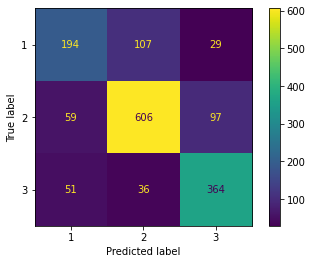

,random forest
accuracy,0.750875
f1,0.723522
presicion,0.725430
recaill,0.723709


In [547]:
X = merged_data2.drop('DrivingStyle' , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
preList = []
recList = []
f1List = []
for x in range(10):

  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)
models = {'random forest':{'accuracy':average_acc ,'presicion': average_pre, 'recaill':average_rec, 'f1':average_f1}}
data_models = pd.DataFrame(data=models)
data_models.head()

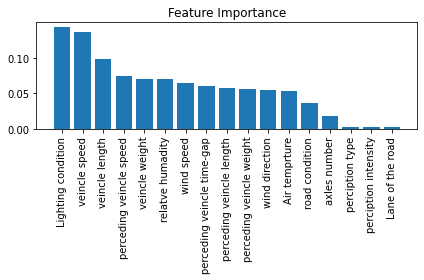

In [548]:
import numpy as np
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [549]:
print(importances[sorted_indices])

[0.14237331 0.13539163 0.09828783 0.07474646 0.06972877 0.06959515
 0.06438366 0.06061531 0.05685869 0.05607809 0.05462007 0.05269506
 0.03715527 0.0184509  0.00354503 0.00304904 0.00242572]


---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7491898898250162
f1 score = 0.7194690615885514
precision = 0.7241671963898272
recall =  0.7186277990195794
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7453013609850939
f1 score = 0.7147170729265456
precision = 0.7174415029387197
recall =  0.7147965151806135
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.745949449125081
f1 score = 0.7177788063348776
precision = 0.7202364564823119
recall =  0.7171922800115618
---------------------------------
---------------------------------
[3 1 3 ... 1 2 2]
accuracy = 0.7498379779650033
f1 score = 0.7201226564438432
precision = 0.7237900915066269
recall =  0.7195765994882569
---------------------------------
---------------------------------
[3 2 3 ... 1 2 2]
accuracy = 0.7453013609850939
f1 score = 0.7175776293302779
precision = 0.7193673321197146


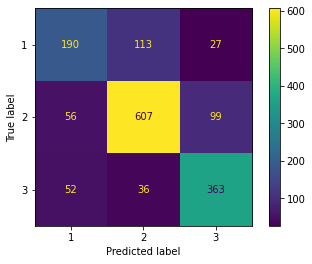

In [550]:
X = merged_data2.drop(['DrivingStyle','perciption type','perciption intensity','Lane of the road'] , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


---------------------------------
---------------------------------
[1 2 2 ... 2 2 2]
accuracy = 0.7206740116655865
precision = 0.784109636568653
recall = 0.7203618671834535
f1 = 0.6795677326353325
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 2 2 ... 2 2 2]
accuracy = 0.7206740116655865
precision = 0.784109636568653
recall = 0.7203618671834535
f1 = 0.6795677326353325
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 2 2 ... 2 2 2]
accuracy = 0.7206740116655865
precision = 0.784109636568653
recall = 0.7203618671834535
f1 = 0.6795677326353325
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------

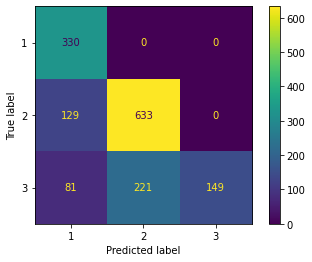

In [551]:
X = merged_data2.drop('DrivingStyle' , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(x_test, y_test)
  y_pred = neigh.predict(x_test)

  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)
models3= [average_acc , average_pre, average_rec, average_f1]
data_models['knn'] = models3

---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7368762151652625
precision = 0.7184364631972123
recall = 0.6908718450105046
f1 = 0.696566137985284
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7368762151652625
precision = 0.7184364631972123
recall = 0.6908718450105046
f1 = 0.696566137985284
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7368762151652625
precision = 0.7184364631972123
recall = 0.6908718450105046
f1 = 0.696566137985284
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------

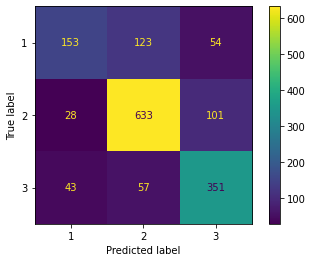

In [552]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):
  clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  clf2.fit(X, y)
  y_pred = clf2.predict(x_test)

  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)
models4= [average_acc , average_pre, average_rec, average_f1]
data_models['SVC'] = models4

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


---------------------------------
---------------------------------
[1 3 3 ... 1 2 2]
accuracy = 0.6467919637070642
precision = 0.6151929894629062
recall = 0.6049119968651369
f1 = 0.6088436519387904
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
average acc= 0.646791963707064
average pre= 0.6151929894629063
average rec= 0.6049119968651367
average f1= 0.6088436519387904


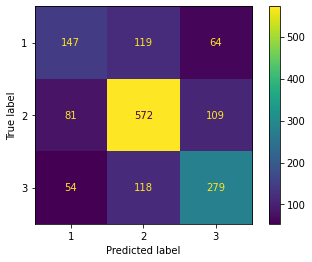

In [553]:
from sklearn.linear_model import LogisticRegression

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):
  clf12 = LogisticRegression(multi_class='multinomial',max_iter=2000,solver='newton-cg').fit(x_test, y_test)
  y_pred = clf12.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")


print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)
models5= [average_acc , average_pre, average_rec, average_f1]
data_models['Logistic'] = models5

---------------------------------
---------------------------------
[1 3 3 ... 1 3 2]
accuracy = 0.6046662346079067
precision = 0.5916684435826479
recall = 0.611174545532141
f1 = 0.5933276336681205
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 3 3 ... 1 3 2]
accuracy = 0.6046662346079067
precision = 0.5916684435826479
recall = 0.611174545532141
f1 = 0.5933276336681205
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 3 3 ... 1 3 2]
accuracy = 0.6046662346079067
precision = 0.5916684435826479
recall = 0.611174545532141
f1 = 0.5933276336681205
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------

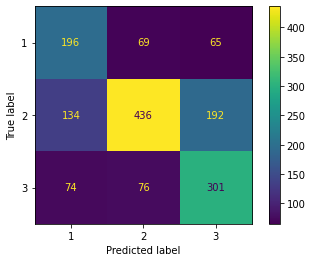

In [554]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):
 
  clf = make_pipeline(MinMaxScaler(),GaussianNB())
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

print('--------------------------------------')
print('--------------------------------------') 
print('--------------------------------------')

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)
models5= [average_acc , average_pre, average_rec, average_f1]
data_models['naive_bayes'] = models5

In [555]:
data_models

,random forest,knn,SVC,Logistic,naive_bayes
accuracy,0.750875,0.720674,0.736876,0.646792,0.604666
f1,0.723522,0.784110,0.718436,0.615193,0.591668
presicion,0.725430,0.720362,0.690872,0.604912,0.611175
recaill,0.723709,0.679568,0.696566,0.608844,0.593328


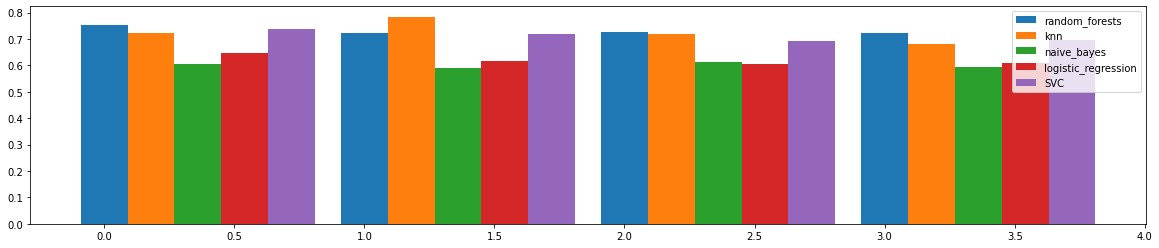

In [586]:
width = 0.18
models = ['accuracy','f1','presicion','recail']
plt.figure(figsize=(20,4))

plt.bar(np.arange(len(data_models['random forest'])), data_models['random forest'], width=width )
plt.bar(np.arange(len(data_models['knn']))+ width, data_models['knn'], width=width )
plt.bar(np.arange(len(data_models['naive_bayes'])) + width*2, data_models['naive_bayes'], width=width )
plt.bar(np.arange(len(data_models['Logistic'])) + width*3, data_models['Logistic'], width=width )
plt.bar(np.arange(len(data_models['SVC'])) + width*4, data_models['SVC'], width=width )

plt.legend(['random_forests','knn','naive_bayes','logistic_regression','SVC'])
plt.show()

In [557]:
#merged_data2.corr()

In [558]:
#plt.figure(figsize=(17,17))
#import seaborn as sns
#sns.heatmap(merged_data2.corr(), annot = True, fmt='.2g')


# **Feature selection and dimensionility reduction**


In [559]:
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, f_classif
X = merged_data2.drop('DrivingStyle' , axis = 1)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
features = np.array(X.columns)
filter = model.get_support()
print("All features:")
print(features)
print(filter)
print("Selected best")
print(features[filter])
print(X_new)

All features:
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'perciption type' 'perciption intensity' 'relatve humadity'
 'wind direction' 'wind speed' 'Lighting condition']
[ True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True]
Selected best
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'relatve humadity' 'wind direction' 'wind speed' 'Lighting condition']
[[1.26500000e+03 1.02430000e+04 2.00000000e+00 ... 1.25157895e+02
  5.26315789e-02 0.00000000e+00]
 [1.68000000e+03 3.08710000e+04 6.00000000e+00 ... 1.57818182e+02
  6.00000000e+00 0.00000000e+00]
 [9.36000000e+02 3.2240

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [560]:
select = SelectKBest(score_func= f_classif, k=5)
z = select.fit_transform(X, y)
filter = select.get_support()
print("All features:")
print(features)
print(filter)
print("Selected best 4:")
print(features[filter])
print(z)

All features:
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'perciption type' 'perciption intensity' 'relatve humadity'
 'wind direction' 'wind speed' 'Lighting condition']
[ True  True  True False False  True False False False False False False
 False False False False  True]
Selected best 4:
['veincle length' 'veincle weight' 'axles number' 'veincle speed'
 'Lighting condition']
[[1.26500000e+03 1.02430000e+04 2.00000000e+00 8.74736842e+01
  0.00000000e+00]
 [1.68000000e+03 3.08710000e+04 6.00000000e+00 8.22727273e+01
  0.00000000e+00]
 [9.36000000e+02 3.22400000e+03 4.00000000e+00 8.50909091e+01
  0.00000000e+00]
 ...
 [1.74700000e+03 3.18640000e+04 6.00000000e+00 8.42105263e+01
  2.00000000e+00]
 [7.10000000e+02 3.24400000e+03 2.00000000e+00 8.26666667e+01
  2.00000000e+00]
 [2.00100000e+03 2.7812000

---------------------------------
---------------------------------
[2 1 3 ... 2 2 2]
accuracy = 0.6714193130265717
f1 score = 0.6406924338754562
precision = 0.6445809452062697
recall =  0.6448799498732282
---------------------------------
---------------------------------
[2 1 3 ... 2 2 2]
accuracy = 0.6675307841866494
f1 score = 0.6353106115627517
precision = 0.6389779037001758
recall =  0.638727393000487
---------------------------------
---------------------------------
[2 1 3 ... 2 2 2]
accuracy = 0.6591056383668179
f1 score = 0.6279366271368656
precision = 0.6321890954086843
recall =  0.6315629892161484
---------------------------------
---------------------------------
[2 1 3 ... 2 2 2]
accuracy = 0.6655865197666883
f1 score = 0.6344187184338753
precision = 0.6374777947313603
recall =  0.6379877127332476
---------------------------------
---------------------------------
[2 1 3 ... 2 2 2]
accuracy = 0.6662346079066753
f1 score = 0.6355697517119785
precision = 0.6394627573420585


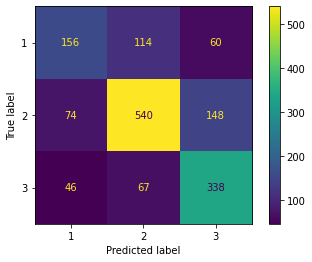

In [561]:
X = merged_data2[['veincle length','veincle weight','axles number','veincle speed','Lighting condition']]
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---------------------------------
---------------------------------
[1 1 3 ... 1 1 2]
accuracy = 0.7226182760855476
precision = 0.7849957970507676
recall = 0.7222775091029364
f1 = 0.6818412252572353
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 1 3 ... 1 1 2]
accuracy = 0.7226182760855476
precision = 0.7849957970507676
recall = 0.7222775091029364
f1 = 0.6818412252572353
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 1 3 ... 1 1 2]
accuracy = 0.7226182760855476
precision = 0.7849957970507676
recall = 0.7222775091029364
f1 = 0.6818412252572353
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
------------------

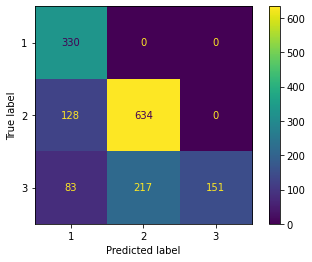

In [562]:
avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(x_test, y_test)
  y_pred = neigh.predict(x_test)

  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [563]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
X = merged_data2.drop('DrivingStyle' , axis = 1)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
fit6 = sfs.fit(X, y)
filter = sfs.get_support(True)


In [564]:
print("All features:")
print(features)
print(filter)
print("Selected best 4:")
print(merged_data2.iloc[:,filter].columns)
print(fit6)

All features:
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'perciption type' 'perciption intensity' 'relatve humadity'
 'wind direction' 'wind speed' 'Lighting condition']
[ 2  4  5  9 12 15 16]
Selected best 4:
Index(['axles number', 'perceding veincle time-gap', 'Lane of the road',
       'perceding veincle length', 'perciption type', 'wind direction',
       'wind speed'],
      dtype='object')
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=7)


---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.5132858068697342
f1 score = 0.4477333030932069
precision = 0.4723553661800674
recall =  0.4473038431171714
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.4854180168502916
f1 score = 0.41318270638065124
precision = 0.4406604222434944
recall =  0.415317763771768
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.49125081011017496
f1 score = 0.4231705824254748
precision = 0.44937851077965413
recall =  0.4241989706940734
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.4873622812702528
f1 score = 0.41774559282503104
precision = 0.44545408481479054
recall =  0.41868037005352154
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.4899546338302009
f1 score = 0.4246485844869224
precision = 0.44860692523

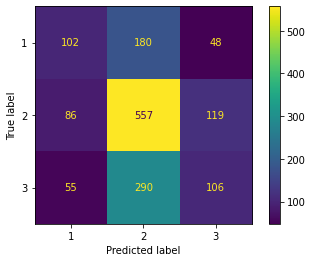

In [565]:
X = merged_data2[['axles number', 'perceding veincle time-gap', 'Lane of the road',
       'perceding veincle length', 'perciption type', 'wind direction',
       'wind speed']]
y = merged_data2['DrivingStyle']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---------------------------------
---------------------------------
[1 3 3 ... 2 1 2]
accuracy = 0.7044718081659106
precision = 0.7780268716035814
recall = 0.6988678798742175
f1 = 0.6468944917921274
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 3 3 ... 2 1 2]
accuracy = 0.7044718081659106
precision = 0.7780268716035814
recall = 0.6988678798742175
f1 = 0.6468944917921274
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 3 3 ... 2 1 2]
accuracy = 0.7044718081659106
precision = 0.7780268716035814
recall = 0.6988678798742175
f1 = 0.6468944917921274
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
------------------

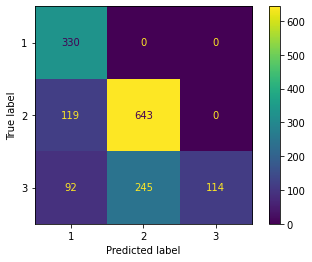

In [566]:
avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(x_test, y_test)
  y_pred = neigh.predict(x_test)

  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [567]:
X = merged_data2.drop('DrivingStyle' , axis = 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
principalComponents = pca.transform(scaled_data)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
newDataframe = pd.concat([principalDataframe, y],axis = 1)
newDataframe.head(5)

,PC1,PC2,DrivingStyle
0,0.005131,-0.181286,2.0
1,2.294394,0.005873,2.0
2,-0.708153,2.855183,2.0
3,0.880408,0.288475,2.0
4,-0.855724,0.354669,2.0


In [568]:
principalDataframe

,PC1,PC2
0,0.005131,-0.181286
1,2.294394,0.005873
2,-0.708153,2.855183
3,0.880408,0.288475
4,-0.855724,0.354669
...,...,...
12852,-1.262319,3.464855
12853,-1.549867,4.124811
12854,2.271728,3.734554
12855,-0.972259,2.499082


---------------------------------
---------------------------------
[3 2 3 ... 2 1 2]
accuracy = 0.48412184057031754
f1 score = 0.4433952333726503
precision = 0.4523836650093322
recall =  0.439654272705934
---------------------------------
---------------------------------
[3 1 3 ... 2 1 2]
accuracy = 0.48088139987038236
f1 score = 0.4383619798575305
precision = 0.44765521137990477
recall =  0.4347828195533208
---------------------------------
---------------------------------
[3 1 3 ... 2 1 2]
accuracy = 0.4899546338302009
f1 score = 0.4481043069616469
precision = 0.45816371723222343
recall =  0.44413328600000385
---------------------------------
---------------------------------
[3 1 3 ... 2 1 2]
accuracy = 0.4854180168502916
f1 score = 0.4393663188449144
precision = 0.45192002383848445
recall =  0.43504295887626016
---------------------------------
---------------------------------
[3 1 3 ... 2 1 2]
accuracy = 0.4847699287103046
f1 score = 0.44448050684996226
precision = 0.454283339

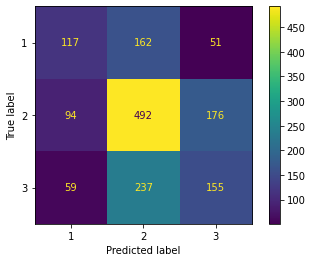

In [569]:
X = principalDataframe
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)

avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---------------------------------
---------------------------------
[1 2 3 ... 3 2 1]
accuracy = 0.7342838626053143
precision = 0.7930232558139535
recall = 0.7349779725427891
f1 = 0.7016039781449604
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 2 3 ... 3 2 1]
accuracy = 0.7342838626053143
precision = 0.7930232558139535
recall = 0.7349779725427891
f1 = 0.7016039781449604
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[1 2 3 ... 3 2 1]
accuracy = 0.7342838626053143
precision = 0.7930232558139535
recall = 0.7349779725427891
f1 = 0.7016039781449604
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
------------------

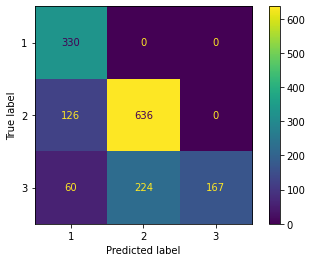

In [570]:
avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(x_test, y_test)
  y_pred = neigh.predict(x_test)

  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# **Oversampling and Undersampling**

In [571]:
from collections import Counter
X = merged_data2.drop(['DrivingStyle'] , axis = 1)

In [572]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
print(sorted(Counter(X_resampled).items()))

[(1, 6346), (2, 6346), (3, 6346)]
[('Air temprture', 1), ('Lane of the road', 1), ('Lighting condition', 1), ('axles number', 1), ('perceding veincle length', 1), ('perceding veincle speed', 1), ('perceding veincle time-gap', 1), ('perceding veincle weight', 1), ('perciption intensity', 1), ('perciption type', 1), ('relatve humadity', 1), ('road condition', 1), ('veincle length', 1), ('veincle speed', 1), ('veincle weight', 1), ('wind direction', 1), ('wind speed', 1)]


dict_items([(2, 6346), (1, 2741), (3, 3770)])
dict_items([(2, 6346), (1, 6346), (3, 6346)])
2    6346
3    3770
1    2741
Name: DrivingStyle, dtype: int64


([<matplotlib.patches.Wedge at 0x7fc83235c730>,
 [Text(0.02217315292679917, 1.0997765006078666, ''),
  Text(-0.7001221014856635, -0.8484273940717018, ''),
  Text(0.8623676270282761, -0.6828777898376988, '')])

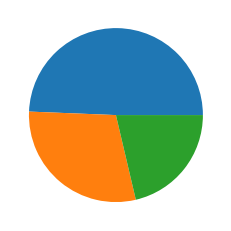

In [573]:
z = Counter(y).items()
v = Counter(y_resampled).items()
u = y.value_counts()
print(z)
print(v)
print(u)
d = merged_data2.DrivingStyle.values
plt.pie(u)

In [574]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.12,random_state=123)

---------------------------------
---------------------------------
[2 2 1 ... 1 2 1]
accuracy = 0.8774617067833698
f1 score = 0.8753459295303038
precision = 0.8825702081946756
recall =  0.8777132262436891
---------------------------------
---------------------------------
[2 2 1 ... 1 2 1]
accuracy = 0.874835886214442
f1 score = 0.8728333452424452
precision = 0.8796554982908206
recall =  0.8750368904997741
---------------------------------
---------------------------------
[2 2 1 ... 1 2 1]
accuracy = 0.8739606126914661
f1 score = 0.8719489103858793
precision = 0.8787984042749413
recall =  0.8741573279139064
---------------------------------
---------------------------------
[2 2 1 ... 1 2 1]
accuracy = 0.8726477024070022
f1 score = 0.8704223455691564
precision = 0.8787460798882446
recall =  0.872895874415661
---------------------------------
---------------------------------
[2 2 1 ... 1 2 1]
accuracy = 0.8800875273522976
f1 score = 0.8782045846678278
precision = 0.884229773307721
re

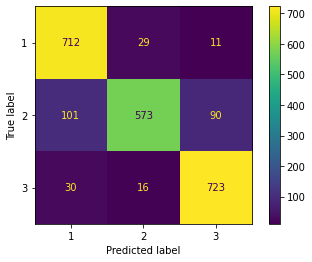

In [575]:
avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

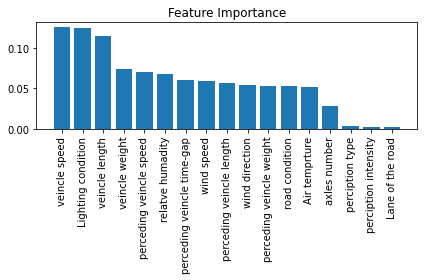

In [576]:
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

---------------------------------
---------------------------------
[2 2 1 ... 1 1 1]
accuracy = 0.7260393873085339
precision = 0.7880765104168942
recall = 0.7280902420813504
f1 = 0.7104539318232893
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[2 2 1 ... 1 1 1]
accuracy = 0.7260393873085339
precision = 0.7880765104168942
recall = 0.7280902420813504
f1 = 0.7104539318232893
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
---------------------------------
[2 2 1 ... 1 1 1]
accuracy = 0.7260393873085339
precision = 0.7880765104168942
recall = 0.7280902420813504
f1 = 0.7104539318232893
--------------------------------------
--------------------------------------
--------------------------------------
---------------------------------
------------------

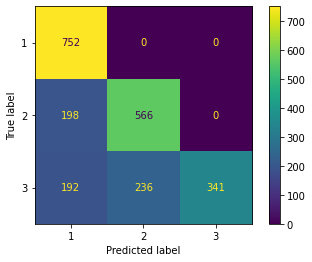

In [577]:
avgList = []
preList = []
recList = []
f1List = []

for x in range(10):

  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(x_test, y_test)
  y_pred = neigh.predict(x_test)

  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)

  print('accuracy =', met.accuracy_score(y_test,y_pred))
  print('precision =',met.precision_score(y_test,y_pred,average='macro'))
  print('recall =',met.recall_score(y_test,y_pred,average='macro'))
  print('f1 =',met.f1_score(y_test,y_pred,average='macro'))

  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')

  avgList.append(met.accuracy_score(y_test,y_pred))
  preList.append(met.precision_score(y_test,y_pred,average='macro'))
  recList.append(met.recall_score(y_test,y_pred,average='macro'))
  f1List.append(met.f1_score(y_test,y_pred,average='macro'))

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()